# Modelling scheduling problem as constraint programming 

In [51]:
!pip install iminizinc

In [52]:
import sys, os
this_folder = os.getcwd()
sys.path.append(os.path.join(this_folder, "discrete_optimisation/"))
import skdecide.hub
%load_ext iminizinc

The iminizinc extension is already loaded. To reload it, use:
  %reload_ext iminizinc


In [53]:
from discrete_optimization.rcpsp.rcpsp_model import RCPSPModel, RCPSPSolution
from discrete_optimization.rcpsp.rcpsp_parser import files_available, parse_file

In [54]:
file = [f for f in files_available if "j301_10.sm" in f][0]
model = parse_file(file)
print(model)

I'm a RCPSP model with 32 tasks.. and ressources =['R1', 'R2', 'R3', 'R4']


In [55]:
# Data definition for minizinc...
index_in_minizinc = {model.tasks_list[i]: i+1 for i in range(model.n_jobs)}
max_time = model.horizon
n_res = len(model.resources_list)
rc = [model.get_max_resource_capacity(r) for r in model.resources_list]
n_tasks = model.n_jobs
d = [model.mode_details[t][1]["duration"] for t in model.tasks_list]
rr = [[model.mode_details[t][1][r] for t in model.tasks_list] for r in model.resources_list]
adj = [[False for t in model.tasks_list] for t in model.tasks_list]
for t in model.tasks_list:
    for s in model.successors[t]:
        adj[index_in_minizinc[t]-1][index_in_minizinc[s]-1] = True


In [56]:
%%minizinc -m bind --v
int: max_time;
set of int: TIMES=0..max_time;
int: n_res;                     % The number of resources
set of int: Res = 1..n_res;     % The set of all resources
array [Res] of int: rc;         % The resource capabilities

% Tasks
%
int: n_tasks;                           % The number of tasks
set of int: Tasks = 1..n_tasks;         % The set of all tasks
array [Tasks] of int: d;                % The task durations
array [Res, Tasks] of int: rr ;         % The resource requirements
array [Tasks, Tasks] of bool: adj;      % Adjacency matrix
array [Tasks] of set of Tasks: suc = [{p|p in Tasks where adj[j,p]}|j in Tasks];

% Variable 
array [Tasks] of var TIMES: s;  % The start times
var TIMES: makespan      ;  % The project duration (makespan)

% WRITE YOUR CONSTRAINTS :) !!!
output ["\(successors)"];
solve satisfy;

MiniZinc to FlatZinc converter, version 2.5.5
Copyright (C) 2014-2021 Monash University, NICTA, Data61
Parsing file(s) /var/folders/gj/k8__b59x78b9g9p2603_bww00000gn/T/tmp6zx_xu5t/model.mzn', '/var/folders/gj/k8__b59x78b9g9p2603_bww00000gn/T/tmp6zx_xu5t/data.json' ...
processing file '/Users/poveda_g/opt/miniconda3/envs/isae_course/lib/python3.7/site-packages/skdecide/hub/share/minizinc/std/stdlib.mzn'
processing file '/Users/poveda_g/opt/miniconda3/envs/isae_course/lib/python3.7/site-packages/skdecide/hub/share/minizinc/std/stdlib/stdlib_internal.mzn'
processing file '/Users/poveda_g/opt/miniconda3/envs/isae_course/lib/python3.7/site-packages/skdecide/hub/share/minizinc/std/stdlib/stdlib_random.mzn'
processing file '/Users/poveda_g/opt/miniconda3/envs/isae_course/lib/python3.7/site-packages/skdecide/hub/share/minizinc/std/stdlib/stdlib_enum.mzn'
processing file '/Users/poveda_g/opt/miniconda3/envs/isae_course/lib/python3.7/site-packages/skdecide/hub/share/minizinc/std/stdlib/stdlib_de

In [57]:
print(s)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## Correction (to hide)

In [58]:
%%minizinc -m bind --verbose --solver chuffed
%load correction/nb2_rcpsp_mzn.mzn

MiniZinc to FlatZinc converter, version 2.5.5
Copyright (C) 2014-2021 Monash University, NICTA, Data61
Parsing file(s) /var/folders/gj/k8__b59x78b9g9p2603_bww00000gn/T/tmp_6qk940f/model.mzn' ...
processing file '/Users/poveda_g/opt/miniconda3/envs/isae_course/lib/python3.7/site-packages/skdecide/hub/share/minizinc/std/stdlib.mzn'
processing file '/Users/poveda_g/opt/miniconda3/envs/isae_course/lib/python3.7/site-packages/skdecide/hub/share/minizinc/std/stdlib/stdlib_internal.mzn'
processing file '/Users/poveda_g/opt/miniconda3/envs/isae_course/lib/python3.7/site-packages/skdecide/hub/share/minizinc/std/stdlib/stdlib_random.mzn'
processing file '/Users/poveda_g/opt/miniconda3/envs/isae_course/lib/python3.7/site-packages/skdecide/hub/share/minizinc/std/stdlib/stdlib_enum.mzn'
processing file '/Users/poveda_g/opt/miniconda3/envs/isae_course/lib/python3.7/site-packages/skdecide/hub/share/minizinc/std/stdlib/stdlib_debug.mzn'
processing file '/Users/poveda_g/opt/miniconda3/envs/isae_course/

In [59]:
solution = RCPSPSolution(problem=model, 
                         rcpsp_schedule={model.tasks_list[i]: {"start_time": start[i],
                                                               "end_time": start[i]+d[i]}
                                         for i in range(model.n_jobs)})

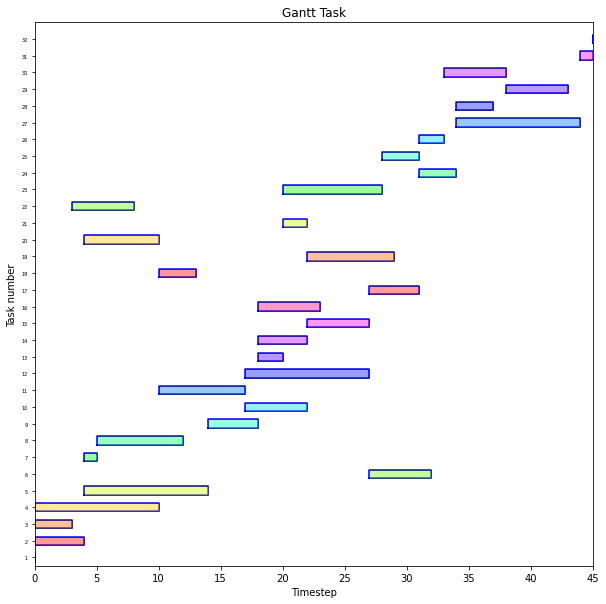

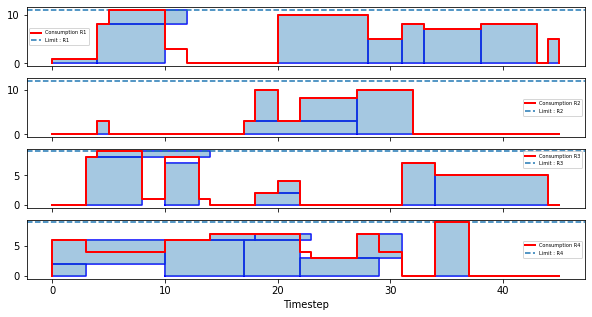

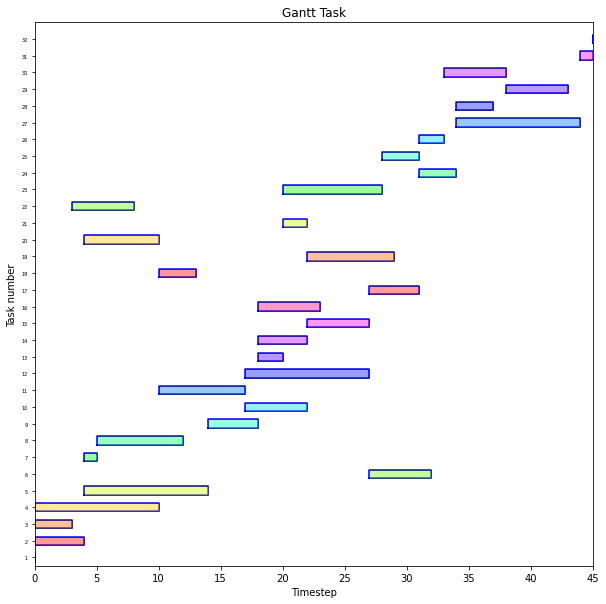

In [60]:
from discrete_optimization.rcpsp.rcpsp_utils import plot_ressource_view, plot_task_gantt
plot_ressource_view(model, solution)
plot_task_gantt(model, solution)